In [1]:
import time
import sys
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
from pandas_datareader.yahoo.headers import DEFAULT_HEADERS
import datetime
import requests_cache
import numpy as np

expire_after = datetime.timedelta(days=3)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)
session.headers = DEFAULT_HEADERS

# from typing import List, Optional
import os
import pickle 
from tqdm import tqdm
# import scipy.stats as sp
from scipy.stats import skew, kurtosis, shapiro
# from utils import *
import matplotlib.pyplot as plt
# import math

%matplotlib inline

import statsmodels.formula.api as smf
sys.path.append('../')
from backtrader_app.backtest import run_backtest

import statsmodels.api as sm
from bs4 import BeautifulSoup
import requests
# tickers = ['AAPL','AMZN','TSLA','GOOG']
# ticker = tickers[0]
# info = yfin.Ticker(ticker).info
# info

In [1]:
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
from pandas_datareader.yahoo.headers import DEFAULT_HEADERS
import datetime
import requests_cache
import numpy as np
import os
import pickle 
from tqdm import tqdm
from scipy.stats import skew, kurtosis, shapiro
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [4]:
!pip install requests-cache

In [9]:
def loadData(ticker,path=r"/Users/lucasmoyer/development/two-dolla/stocks.pkl"):
    savedData = {}
    with open(path, 'rb') as handle:
        savedData = pickle.load(handle)
    return savedData[ticker]
    
        
loadData('T')

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-01-03,18.510000,18.850000,18.410000,18.740000,17.278513,42149200
1,2023-01-04,18.870001,19.370001,18.809999,19.139999,17.647316,43926800
2,2023-01-05,19.139999,19.320000,18.959999,19.209999,17.711855,31081800
3,2023-01-06,19.350000,19.790001,19.340000,19.530001,18.006903,36050300
4,2023-01-09,19.240000,19.240000,18.980000,19.040001,17.808613,51981100
...,...,...,...,...,...,...,...
245,2023-12-22,16.500000,16.730000,16.500000,16.549999,16.284359,26736000
246,2023-12-26,16.500000,16.610001,16.440001,16.570000,16.304037,22750400
247,2023-12-27,16.490000,16.620001,16.450001,16.580000,16.313877,27728700
248,2023-12-28,16.540001,16.870001,16.530001,16.740000,16.471310,32112900


In [64]:

from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()


from pandas_datareader.yahoo.headers import DEFAULT_HEADERS

import datetime

import requests_cache

expire_after = datetime.timedelta(days=3)

session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)

session.headers = DEFAULT_HEADERS
current_date = datetime.datetime.now()
current_date_formatted = current_date.strftime("%Y-%m-%d")
first_day_of_year_formatted = datetime.datetime(current_date.year,1,1).strftime("%Y-%m-%d")
def getStocksData(ticker, start='1/1/2023', end='9/1/2023', save_new=False, saveToCSV=True):
    path=r"/Users/lucasmoyer/development/two-dolla/stocks.pkl"
    savedData = {}
    with open(path, 'rb') as handle:
        savedData = pickle.load(handle)

    if (save_new or ticker not in savedData):
        stock_data = pdr.get_data_yahoo(ticker, start=start,end=end, session=session)
        savedData[ticker] = stock_data # saved the stock data to our python dictionary
        with open(path, 'wb') as handle:
                    pickle.dump(savedData, handle,
                                protocol=pickle.HIGHEST_PROTOCOL)
    else:
        return savedData[ticker]
    return stock_data

current_date = datetime.datetime.now()
current_date_formatted = current_date.strftime("%Y-%m-%d")
first_day_of_year_formatted = datetime.datetime(current_date.year,1,1).strftime("%Y-%m-%d")

data = getStocksData('T', start=first_day_of_year_formatted, end=current_date_formatted, save_new=False)

In [79]:
df = data
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,exp_short,exp_long,macd,macd_norm,position,position_diff,holdings,cash,total,cash_needed
0,2023-01-03,18.510000,18.850000,18.410000,18.740000,17.560369,42149200,17.560369,17.560369,0.000000,0.185314,0.000000,0.000000,0.000000,1000.000000,1000.000000,NaN
1,2023-01-04,18.870001,19.370001,18.809999,19.139999,17.935188,43926800,17.618034,17.588134,0.029900,0.242171,24.217055,24.217055,456.975856,543.024144,1000.000000,456.975856
2,2023-01-05,19.139999,19.320000,18.959999,19.209999,18.000784,31081800,17.676919,17.618701,0.058218,0.296019,29.601858,5.384802,566.579534,439.959035,1006.538570,103.065109
3,2023-01-06,19.350000,19.790001,19.340000,19.530001,18.300640,36050300,17.772876,17.669215,0.103661,0.382431,38.243100,8.641243,740.004000,272.750989,1012.754989,167.208046
4,2023-01-09,19.240000,19.240000,18.980000,19.040001,18.099117,51981100,17.823067,17.701059,0.122008,0.417318,41.731756,3.488656,802.918969,205.629256,1008.548225,67.121734


In [80]:
short = 12
long = 26
df['exp_short']= df['Adj Close'].ewm(span=short, adjust=False).mean()
df['exp_long'] = df['Adj Close'].ewm(span=long, adjust=False).mean()
df['macd'] = df['exp_short']  - df['exp_long'] 
df['macd_norm'] = (df['macd'] - df['macd'].min()) * 2 / (df['macd'].max() - df['macd'].min()) -1 
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,exp_short,exp_long,macd,macd_norm,position,position_diff,holdings,cash,total,cash_needed
236,2023-12-11,16.910000,16.940001,16.530001,16.620001,16.620001,43835000,16.644322,16.255625,0.388697,0.924442,64.705428,-6.383915,1094.168781,28.77974,1122.948521,0.0
237,2023-12-12,16.559999,16.580000,16.340000,16.410000,16.410000,41348800,16.608273,16.267060,0.341213,0.834147,64.705428,-9.029474,1071.521857,28.77974,1100.301597,0.0
238,2023-12-13,16.330000,16.500000,16.100000,16.450001,16.450001,53889700,16.583923,16.280611,0.303312,0.762077,64.705428,-7.207008,1056.639638,28.77974,1085.419378,0.0
239,2023-12-14,16.510000,16.809999,16.510000,16.650000,16.650000,54485000,16.594089,16.307973,0.286115,0.729377,64.705428,-3.270000,1068.286635,28.77974,1097.066374,0.0
240,2023-12-15,16.520000,16.660000,16.450001,16.520000,16.520000,65897600,16.582691,16.323679,0.259012,0.677838,64.705428,-5.153947,1068.933704,28.77974,1097.713444,0.0


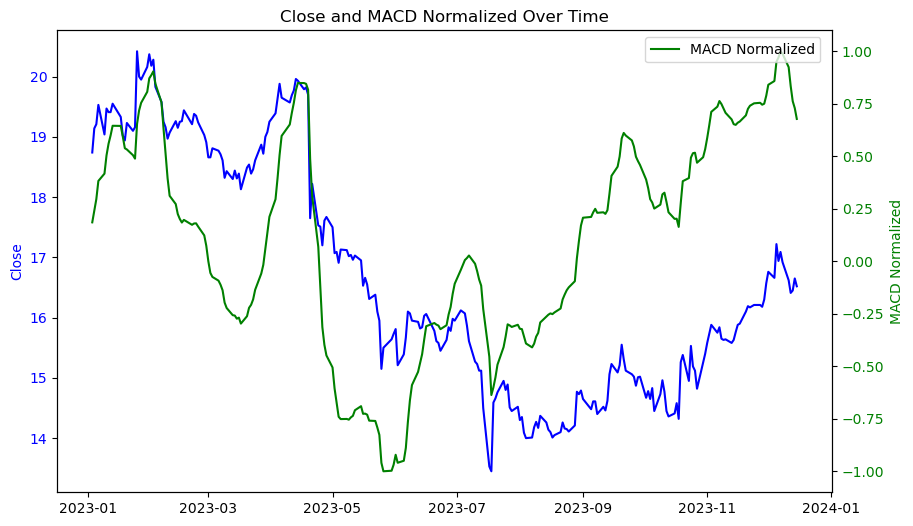

In [81]:
plt.figure(figsize=(10, 6))

# Plotting Close on the first y-axis
plt.plot(df['Date'], df['Close'], label='Close', color='blue')
plt.ylabel('Close', color='blue')
plt.tick_params(axis='y', labelcolor='blue')

# Creating a second y-axis for macd_norm
ax2 = plt.twinx()
ax2.plot(df['Date'], df['macd_norm'], label='MACD Normalized', color='green')
ax2.set_ylabel('MACD Normalized', color='green')
ax2.tick_params(axis='y', labelcolor='green')

# Setting labels and title
plt.title('Close and MACD Normalized Over Time')
plt.xlabel('Date')

# Adding legend
plt.legend(loc='upper left', bbox_to_anchor=(0.75, 1))

plt.show()

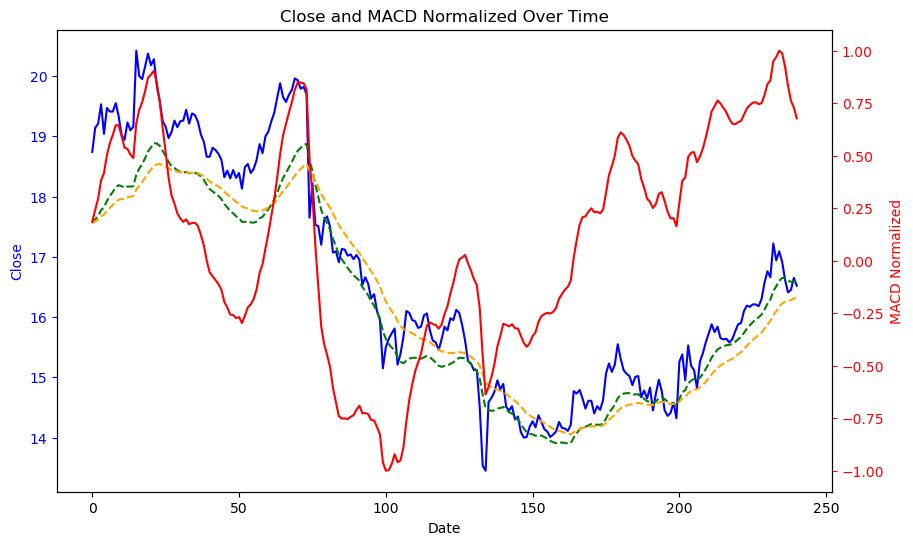

In [82]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot Close on the first y-axis
ax1.plot(df.index, df['Close'], color='b', label='Close')
ax1.plot(df.index, df['exp_short'], color='g', linestyle='--', label='Exp Short')
ax1.plot(df.index, df['exp_long'], color='orange', linestyle='--', label='Exp Long')

ax1.set_xlabel('Date')
ax1.set_ylabel('Close', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for macd_norm
ax2 = ax1.twinx()
ax2.plot(df.index, df['macd_norm'], color='r', label='MACD Normalized')
ax2.set_ylabel('MACD Normalized', color='r')
ax2.tick_params('y', colors='r')

plt.title('Close and MACD Normalized Over Time')
plt.show()

In [83]:
initial_capital = 1000
df['position'] = 100 * df['macd_norm'] # renaming macd_norm to position for readability and increasing the weight of the strat
df['position'].at[0] = 0 # we set it to zero since we start with no stock position
df['position_diff'] = df['position'].diff() # gets the difference in positions so we know how to adjust our stock trades
df['position_diff'].at[0] = 0 # set to zero since it's NaN since there is no difference on the first day
df['holdings'] = 0 # represents how much our stock position is worth, starts at 0 since we don't have any stocks yet
df['cash'] = initial_capital # tracks how much cash we have
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,exp_short,exp_long,macd,macd_norm,position,position_diff,holdings,cash,total,cash_needed
0,2023-01-03,18.510000,18.850000,18.410000,18.740000,17.560369,42149200,17.560369,17.560369,0.000000,0.185314,0.000000,0.000000,0,1000,1000.000000,NaN
1,2023-01-04,18.870001,19.370001,18.809999,19.139999,17.935188,43926800,17.618034,17.588134,0.029900,0.242171,24.217055,24.217055,0,1000,1000.000000,456.975856
2,2023-01-05,19.139999,19.320000,18.959999,19.209999,18.000784,31081800,17.676919,17.618701,0.058218,0.296019,29.601858,5.384802,0,1000,1006.538570,103.065109
3,2023-01-06,19.350000,19.790001,19.340000,19.530001,18.300640,36050300,17.772876,17.669215,0.103661,0.382431,38.243100,8.641243,0,1000,1012.754989,167.208046
4,2023-01-09,19.240000,19.240000,18.980000,19.040001,18.099117,51981100,17.823067,17.701059,0.122008,0.417318,41.731756,3.488656,0,1000,1008.548225,67.121734


In [84]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'exp_short', 'exp_long', 'macd', 'macd_norm', 'position',
       'position_diff', 'holdings', 'cash', 'total', 'cash_needed'],
      dtype='object')

<Axes: xlabel='Date'>

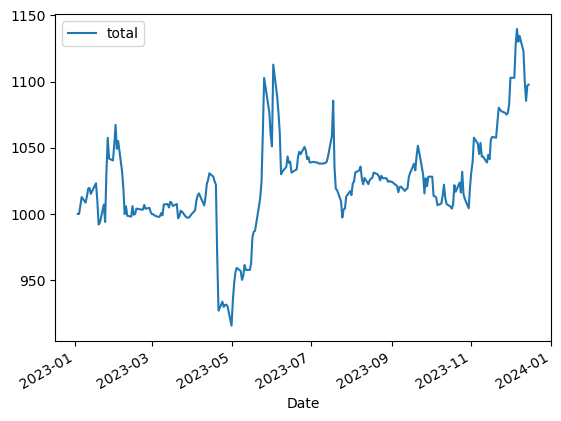

In [88]:
outOfCash = False
debug = True
for index, row in df.iterrows():
    if index==0:
        continue
    cash = df.loc[index -1]['cash']
    position = df.loc[index]['position']
    price = row['Open']
    pos_diff = df.loc[index]['position'] - df.loc[index -1]['position'] 
    cash_needed = pos_diff * price

    df.at[index, 'cash_needed'] = cash_needed


    if (cash > cash_needed) and (not outOfCash):
        cash = cash - cash_needed
    elif (cash_needed < 0):
        cash = cash-cash_needed
        if (cash > (position * price)):
            outOfCash = False
    else:
        # ran out of money
        if (index == 1):
            df[index, position] = cash / price # when we don't have enough money for the initial trade, then we buy the most stock that we can afford
            cash = 0
        else:
            df.at[index,'position'] = df.at[index -1, 'position'] # don't do anything since we are don't have enough money to trade on our startegy
        
        outOfCash = True
    
    df.at[index,'cash'] = cash

df['holdings'] = df['position'] * df['Open']
df['total'] = df['holdings'] + df['cash']
df.plot(x=f'Date', y='total')

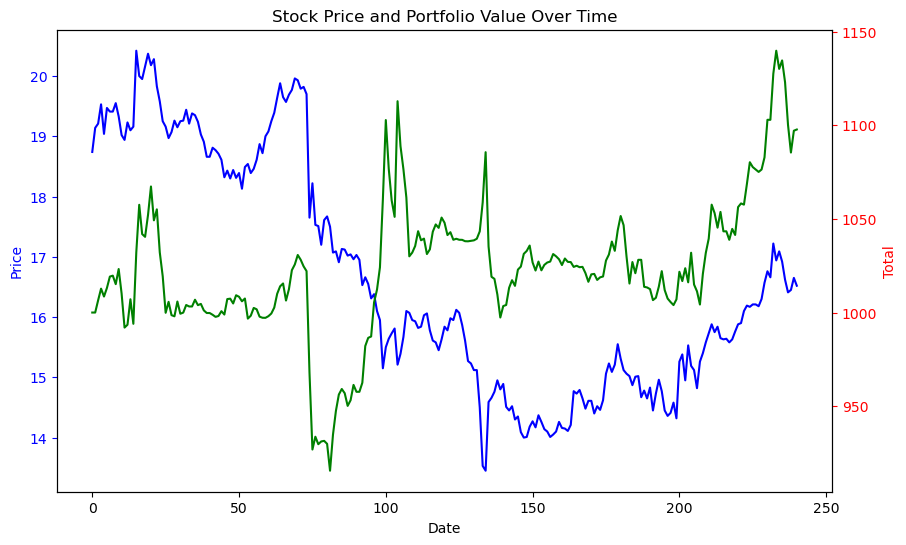

In [93]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df.index, df['Close'], color='b', label='Price')

ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for macd_norm
ax2 = ax1.twinx()
ax2.plot(df.index, df['total'], color='g', label='Total')

ax2.set_ylabel('Total', color='r')
ax2.tick_params('y', colors='r')

plt.title('Stock Price and Portfolio Value Over Time')
plt.show()

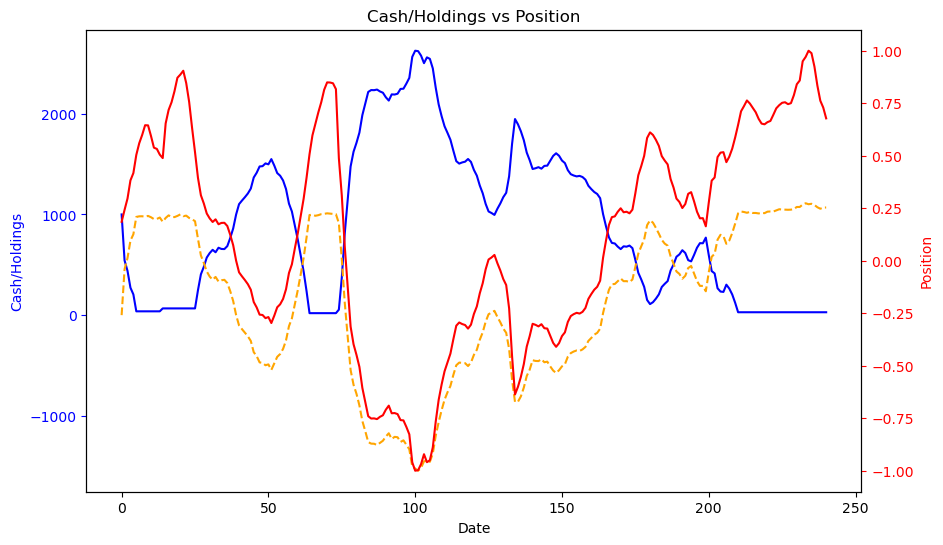

In [95]:
# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.plot(df.index, df['cash'], color='b', label='Cash')
ax1.plot(df.index, df['holdings'], color='orange', linestyle='--', label='Holdings')

ax1.set_xlabel('Date')
ax1.set_ylabel('Cash/Holdings', color='b')
ax1.tick_params('y', colors='b')

# Create a second y-axis for macd_norm
ax2 = ax1.twinx()
ax2.plot(df.index, df['macd_norm'], color='r', label='macd_norm')
# ax2.plot(df.index, df['cash'], color='y', label='cash')
# ax2.plot(df.index, df['holdings'], color='r', label='holdings')
ax2.set_ylabel('Position', color='r')
ax2.tick_params('y', colors='r')

plt.title('Cash/Holdings vs Position')
plt.show()

In [35]:
import time
import sys
import pandas as pd
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
from pandas_datareader.yahoo.headers import DEFAULT_HEADERS
import datetime
import requests_cache
import numpy as np

expire_after = datetime.timedelta(days=3)
session = requests_cache.CachedSession(cache_name='cache', backend='sqlite', expire_after=expire_after)
session.headers = DEFAULT_HEADERS

# from typing import List, Optional
import os
import pickle 
from tqdm import tqdm
# import scipy.stats as sp
from scipy.stats import skew, kurtosis, shapiro
# from utils import *
import matplotlib.pyplot as plt
%matplotlib inline

import statsmodels.formula.api as smf
sys.path.append('../')
from backtrader_app.backtest import run_backtest

import statsmodels.api as sm
from bs4 import BeautifulSoup
import requests




current_date = datetime.datetime.now()
current_date_formatted = current_date.strftime("%Y-%m-%d")
first_day_of_year = datetime.datetime(
    current_date.year, 1, 1)
first_day_of_year_formatted = datetime.datetime(
    current_date.year, 1, 1).strftime("%Y-%m-%d")


def print_nice_dictionary(data_dict):
    for key, value in data_dict.items():
        if isinstance(value, tuple):
            value = f'{value[0]}(statistic), {value[1]}(pvalue)'
        print(f"{key}: {value}")

# UNUSED. Another way to get monthly returns but uses the first and last day of a month instead of first day of the next month
def custom_monthly_return(resampled_data):
    first_day_return = resampled_data['total'].iloc[0]
    last_day_return = resampled_data['total'].iloc[-1]
    if pd.notna(first_day_return) and pd.notna(last_day_return) and first_day_return != 0:
        monthly_return = (last_day_return - first_day_return) / first_day_return
        return monthly_return
    else:
        return pd.NA
    
# For converting a number like 1K to 1000 from cnbc.com market caps
def convert_to_number(string):
    suffixes = {
        'K': 10**3,
        'M': 10**6,
        'B': 10**9,
        'T': 10**12
    }

    try:
        # Check if the last character is a letter denoting suffix
        suffix = string[-1]
        if suffix in suffixes:
            # Convert the string without the suffix into a float
            number = float(string[:-1])
            # Multiply by the appropriate factor based on the suffix
            number *= suffixes[suffix]
        else:
            # If there's no suffix, simply convert the string into a float
            number = float(string)
    except ValueError:
        print("Invalid input format")
        return None

    return number
    
class Stock:
    def __init__(self, ticker, start=first_day_of_year_formatted, end=current_date_formatted, df=None, initial_capital=1000, path=r"/Users/lucasmoyer/development/two-dolla/stocks.pkl", save_new=True, debug=False):
        self.ticker = ticker
        self.initial_capital = initial_capital
        self.isBankrupt = 0
        self.path = path
        self.savedBars = None
        self.df = df
        self.start = start
        self.end = end
        self.positionOutCash = False
        self.strategies = []
        self.debug = debug
        self.save_new = save_new
        self.sum_stats = None

        with open(self.path, 'rb') as handle:
            self.savedBars = pickle.load(handle)
            if self.debug:
                print("saved bars")
                print(self.savedBars.keys())
            if ticker in self.savedBars:
                if self.debug:
                    print("ticker exists in savedBars")
                self.df = self.savedBars[ticker]
        if (self.df is None or save_new):
            if self.debug:
                print('getting new data')

            self.df = self.getStocksData(ticker,start=self.start,end=self.end,save_new=True)

        self.bars = self.df
        self.positions = pd.DataFrame(self.df.index)
        self.sum_stats = self.get_sum_stats(self.ticker)

    def getSavedData(self, ticker):
        with open(self.path, 'rb') as handle:
            stocks = pickle.load(handle)
            if self.ticker in stocks:
                return stocks[self.ticker]
            else:
                return None

    # gets stock ticket data for current day
    def getStocksData(self, tickers, start=first_day_of_year_formatted, end=current_date_formatted, save_new=False, saveToCSV=True):
        # check if data exists, if not pull data
        if (self.save_new or self.ticker not in self.savedBars):

            try:
                if (self.debug):
                    print(f"Trying download of {self.ticker}")
                stock_data = pdr.get_data_yahoo(
                    self.ticker, start=start, end=end, session=session)
                stock_data = stock_data.reset_index()
                if (self.debug):
                    print(f"Downloaded bars of {self.ticker}")
                if saveToCSV:
                    path = "/Users/lucasmoyer/development/two-dolla/datasets/stock_csvs"
                    stock_data.to_csv(
                        f'{path + "/" + self.ticker}.csv', index=False, encoding='utf-8')
                self.savedBars[self.ticker] = stock_data
                with open(self.path, 'wb') as handle:
                    pickle.dump(self.savedBars, handle,
                                protocol=pickle.HIGHEST_PROTOCOL)
                return stock_data
            except:
                print("Skipping stock for {}, bad data :<".format(self.ticker))
        else:
            return self.savedBars[self.ticker]

    def get_sum_stats(self,symbol):
        try:
            stat_dict = {}
            url = f'https://www.cnbc.com/quotes/{symbol}?tab=news'
            html = requests.get(url).content
            soup = BeautifulSoup(html, 'html.parser')
            sum_stats = soup.find_all('li', {'class': 'Summary-stat'})
            stat_dict = {}
            for stat in sum_stats:
                label = stat.find('span', {'class': 'Summary-label'}).text
                value = stat.find('span', {'class': 'Summary-value'}).text

                if label == "Market Cap":
                    value = convert_to_number(value)
                stat_dict[label] = value
                stat_dict['date'] = datetime.datetime.now()
            return stat_dict
        except Exception as e:
            print(f"Error processing {symbol}: {str(e)}")
            return {}

    def addStrategy(self, func):
        self.strategies.append(func)

    def viewStrategies(self):
        for x in self.strategies:
            print(x)

    def backtest(self):
        strategies = self.strategies

        self.positions[self.ticker +
                       '_position'] = pd.concat(strategies).groupby(level=0).mean()
        self.positions[self.ticker + '_position'].at[0] = 0
        self.positions[self.ticker + '_open'] = self.bars.Open
        self.positions[self.ticker + '_close'] = self.bars.Close
        self.positions['date'] = self.bars.Date

        self.positions[self.ticker +
                       '_pos_diff'] = self.positions[self.ticker + "_position"].diff()
        self.positions[self.ticker + "_holdings"] = 0
        self.positions[self.ticker + "_pos_diff"].at[0] = 0
        self.positions.at[0, f"{self.ticker}_cash"] = self.initial_capital

        for index, row in self.positions.iterrows():
            if index == 0:
                continue

            price = row[self.ticker + "_open"]
            cash = self.positions.loc[index - 1][self.ticker + "_cash"]
            holdings = self.positions.loc[index - 1][self.ticker + "_holdings"]
            position = self.positions.loc[index][self.ticker + '_position']
            pos_diff = self.positions.loc[index][self.ticker + '_position'] - \
                self.positions.loc[index - 1][self.ticker + '_position']
            cash_needed = pos_diff * price
            if (self.debug):
                print(f"For index: {index}")
                print(
                    f"previous position {self.positions.loc[index - 1][self.ticker + '_position']}")
                print(f"price {price}")
                print(f"previous cash {cash}")
                print(f"strategy position {position}")
                print(f"cash needed: {cash_needed}")

            if (cash > cash_needed) and (not self.positionOutCash):
                cash = cash - cash_needed
                if (self.debug):
                    print(f"Making trade: Cash = {cash}")
                # holdings = holdings + cash_needed

            # is there enough cash
            elif (cash_needed < 0):
                cash = cash - cash_needed
                if (self.debug):
                    print(f"cash added from short {cash}")
                if (cash > (position * price)):
                    self.positionOutCash = False
                    if (self.debug):
                        print(
                            f"position is back in range {index, (position *price)}")
            else:
                if (self.debug):
                    print("ran out of money")
                if (index == 1):
                    self.positions.at[index,
                                      f"{self.ticker}_position"] = cash / price
                    cash = 0
                    if (self.debug):
                        print(
                            f"setting first index position {cash} {price} {cash/price}")
                else:
                    self.positions.at[index,
                                      f"{self.ticker}_position"] = self.positions.at[index - 1, f"{self.ticker}_position"]
                    if (self.debug):
                        print("setting position to prev position")

                self.positionOutCash = True

                if (self.debug):
                    print(
                        f"postion {self.positions.at[index, f'{self.ticker}_position']}")
            self.positions.at[index, f"{self.ticker}_cash"] = cash

        self.positions[f'{self.ticker}_holdings'] = self.positions[f"{self.ticker}_position"] * \
            self.positions[f"{self.ticker}_open"]
        self.positions['total'] = self.positions[f"{self.ticker}_cash"] + \
            self.positions[f"{self.ticker}_holdings"]

        self.positions = self.positions.round(2)
        return self.positions

    def plotBackTest(self):
        if 'total' not in self.positions.columns:
            self.backtest()
        self.positions.plot(x=f'date', y='total')

    def saveToCSV(self):
        print('Save to CSV')
        self.positions.set_index('date', inplace=True)
        self.positions.rename(columns={
                f"{self.ticker}_position": 'Position',
                'total': 'Total'
        }, inplace=True, errors=False)
        self.df.set_index('Date', inplace=True)
        self.df['Date'] = self.df.index
        df = pd.merge(self.df[['Date', 'Open', 'High', 'Low','Close', 'Adj Close','Volume']], self.positions[["Position", "Total"]], left_index=True, right_index=True,how='inner')
        # df['Date'] = df.index
        path = "/Users/lucasmoyer/development/two-dolla/datasets/stock_csvs"
        df.to_csv(f'{path + "/" + self.ticker}.csv', index=False, encoding='utf-8')

    def backtrader(self):
        run_backtest(f"/Users/lucasmoyer/development/two-dolla/datasets/stock_csvs/{self.ticker}.csv",fromdate=convert_to_tuple(self.start),todate=convert_to_tuple(self.end),debug=True)

    ### STRATEGIES ###
    def macd(self, short=12, long=26):
        df = self.df
        exp1 = df['Adj Close'].ewm(span=short, adjust=False).mean()
        exp2 = df['Adj Close'].ewm(span=long, adjust=False).mean()
        df['macd'] = exp1 - exp2
        df['macd_norm'] = (df['macd'] - df['macd'].min()) / \
            (df['macd'].max() - df['macd'].min())
        return df['macd_norm']

    def buyStock(self, amount, inDollars=False):
        if inDollars:
            # buys the dollar amount of a stock
            first_price = self.df['Open'].iloc[0]
            shares = amount / first_price
            return pd.Series(shares, index=self.bars.index)
        return pd.Series(amount, index=self.bars.index)
        


class Portfolio:
    def __init__(self, tickers=[], start=first_day_of_year_formatted, end=current_date_formatted, initial_capital=1000, save_new=True, debug=False):
        self.stocks = []
        self.debug = debug
        self.current_capitial = initial_capital
        self.backtest_df = None
        self.markov_data = None
        self.start = start
        self.end = end
        self.save_new = save_new
        self.stats = None
        self.ff_stats = None
        self.initial_capital = initial_capital

        for ticker in tickers:
            self.addStock(ticker)

    # either takes ticker or Stock
    def addStock(self, stock_instance):
        if isinstance(stock_instance, str):
            # If the input is a string (ticker), fetch data and create a Stock object
            stock_instance = Stock(stock_instance, df=None,start=self.start, end=self.end, save_new=self.save_new, debug=self.debug)
            self.stocks.append(stock_instance)
        elif isinstance(stock_instance, Stock):
            stock_instance.save_new = self.save_new
            # self.initial_capital = self.initial_capital - stock_instance.initial_capital
            self.stocks.append(stock_instance)
        self.updateInitalCapital(self.initial_capital)
        return stock_instance
        
    def updateInitalCapital(self, initial_capital):
        self.current_capitial = initial_capital
        for stock in self.stocks:
            self.current_capitial -= stock.initial_capital


    def equalWeightedPortfolio(self, tickers, capital=1000):
        num_stocks = len(tickers)
        ini_cap = capital / num_stocks
        # self.initial_capital = self.initial_capital - capital
        for ticker in tickers:
            stock_instance = Stock(ticker,start=self.start, end=self.end,initial_capital=ini_cap,save_new=self.save_new)
            stock_instance.addStrategy(stock_instance.buyStock(ini_cap,inDollars=True))
            self.addStock(stock_instance)
        # self.updateInitalCapital(self.initial_capital)

    def marketCapWeightedPortfolio(self, tickers, capital=1000):
        total = 0
        for ticker in tickers:
            stock_instance = self.addStock(ticker)
            total += stock_instance.sum_stats['Market Cap']
        
        for stock in self.stocks:
            weight = stock.sum_stats['Market Cap'] / total
            print(f"For stock {stock.ticker}, Market cap={stock.sum_stats['Market Cap']}, Weight={weight}")
            
            weighted_capital = capital * weight
            if self.debug:
                print(f"stock {stock.ticker} has weight {weight}. Setting weighted cap to {weighted_capital}")
            stock.initial_capital = weighted_capital
            stock.addStrategy(stock.buyStock(weighted_capital,inDollars=True))
        self.updateInitalCapital(self.initial_capital)

    def get_by_ticker(self, ticker):
        for stock in self.stocks:
            if (stock.ticker == ticker):
                return stock
                break
        return None

    def markowitz(self, weight=1, msr=True, plot=False):
        self.addReturns()
        port_returns = pd.DataFrame()
        for stock in self.stocks:
            port_returns[stock.ticker] = stock.df['simple_returns']
        risk_free = 0
        markov_runs = 10000

        markov_data = pd.DataFrame(
            columns=["id", "return", "volatility", "weights"])
        for x in range(0, int(markov_runs)):
            weights = getRandomWeights(len(self.stocks))
            volatility = getPortWeightedVol(port_returns, weights)
            ann_ret = getPortWeightedAnnualReturn(port_returns, weights)
            row = {
                "id": x,
                "return": ann_ret,
                "volatility": volatility,
                "weights": weights
            }
            markov_data = pd.concat(
                [markov_data, pd.DataFrame.from_records([row])])
        markov_data["sharpe"] = (
            markov_data["return"] - risk_free) / markov_data["volatility"]
        markov_data.reset_index()
        self.markov_data = markov_data

        best_port = None
        if msr:
            best_port = markov_data.sort_values(
                by=["sharpe"], ascending=False).head(1)
        else:
            best_port = markov_data.sort_values(
                by=["volatility"], ascending=True).head(1)

        MSR = markov_data.sort_values(by=["sharpe"], ascending=False).head(1)
        GMV = markov_data.sort_values(
            by=["volatility"], ascending=True).head(1)

        weights = {}
        for index, x in enumerate(list(best_port['weights'])[0]):
            weights[self.stocks[index].ticker] = x * weight
            stock_instance = self.get_by_ticker(self.stocks[index].ticker)
            stock_instance.initial_capital = x * weight
            stock_instance.addStrategy(stock_instance.buyStock(x * weight,inDollars=True))
        self.updateInitalCapital(weight)

        if (plot):
            # Plotting the scatter plot
            plt.scatter(markov_data['volatility'],
                        markov_data['return'], label='Data')

            # Highlight the MSR index row with a different color
            plt.scatter(best_port['volatility'], best_port['return'], color='red',
                        label=f"Optimized Portfolio {'MSR' if msr else 'GMV'}")

            # Adding labels and title
            plt.xlabel('Volatility')
            plt.ylabel('Return')
            plt.title('Scatter Plot of Return vs Volatility')
            plt.legend()

        return markov_data, weights

    def addReturns(self):
        for stock in self.stocks:
            stock.df['simple_returns'] = stock.df['Adj Close'].pct_change()
            stock.df['log_returns'] = np.log(stock.df['Adj Close'] + 1)
            stock.df['cum_daily_return'] = (
                (1 + stock.df['simple_returns']).cumprod() - 1)
            stock.df = stock.df.dropna()

    def backtest(self, plot=False, stats=False, ff_stats=False,ff_2=False, saveToCsv=False):
        ticker_list = []
        self.backtest_df = pd.DataFrame(self.stocks[0].df.Date)
        # return backtest_df
        for stock in self.stocks:
            stock.backtest()
            ticker_list.append(f"{stock.ticker}_total")
            self.backtest_df[f"{stock.ticker}_total"] = stock.positions.total
            self.backtest_df[f"{stock.ticker}_position"] = stock.positions[f"{stock.ticker}_position"]

        self.backtest_df['total_strats'] = self.backtest_df[ticker_list].sum(axis=1)
        self.backtest_df['cash'] = self.current_capitial
        self.backtest_df['total'] = self.backtest_df['total_strats'] + self.current_capitial
        self.start = self.backtest_df['Date'].iloc[0]
        self.end = self.backtest_df['Date'].iloc[-1]

        if (plot):
            if self.debug:
                print("PLOT BACKTEST")

            if 'total_returns' not in self.backtest_df.columns:
                self.backtest_df['total_returns'] = self.backtest_df['total'].pct_change(
                )
                self.backtest_df['cum_daily_return'] = (
                    (1 + self.backtest_df['total_returns']).cumprod() - 1)
                
            self.plotBacktest()

        if (stats or ff_stats):
            if 'total_returns' not in self.backtest_df.columns:
                self.backtest_df['total_returns'] = self.backtest_df['total'].pct_change(
                )
                self.backtest_df['cum_daily_return'] = (
                    (1 + self.backtest_df['total_returns']).cumprod() - 1)
           

            # distribution stats
            self.stats = {}

            self.stats['pct_return'] = ((self.backtest_df['total'].iloc[-1] - self.backtest_df['total'].iloc[0]) / self.backtest_df['total'].iloc[0])
            self.stats['vol'] = np.std(self.backtest_df['total_returns'])
            self.stats['vol_annual'] = self.stats['vol'] * np.sqrt(252)
            self.stats['mean_daily_return'] = np.mean(
                self.backtest_df['total_returns'])
            self.stats['mean_annual_return'] = (
                (1 + self.stats['mean_daily_return'])**252) - 1
            # negative skew is right leaning, we want positive skew (left leaning) so long tail of positive returns and predictable negative returns
            self.stats['skewness'] = skew(
                self.backtest_df['total_returns'].dropna())
            # scipy automatically returns excess kurtosis
            self.stats['excess_kurtosis'] = kurtosis(
                self.backtest_df['total_returns'].dropna())
            # if p value is < 0.05, than you reject the null hypothesis of normality and assume the data is non-normally distributed
            self.stats['shapiro'] = shapiro(
                self.backtest_df['total_returns'].dropna())
            if (stats):
                print("RETURNS STATS")
                print_nice_dictionary(self.stats)
            # print(self.stats)

            self.backtest_df['Date'] = pd.to_datetime(self.backtest_df['Date'])
            self.backtest_df.set_index('Date', inplace=True)
        
        if (ff_stats):
            # Resample to monthly frequency and sum the returns for each month
            monthly_returns = self.backtest_df.resample("M").agg(lambda x: (x + 1).prod() - 1).to_period("M")

            if 'returns' not in monthly_returns.columns:
                monthly_returns = monthly_returns.rename(columns={'total_returns': 'returns'})

            if self.debug:
                print("MONTHLY PERCENTAGE RETURNS")
                print(monthly_returns)

            # FAMA FRENCH
            ff_factor_data = None
            path = r"/Users/lucasmoyer/development/two-dolla/datasets/factor_data/f_f_5_factor.pkl"
            with open(path, 'rb') as handle:
                ff_factor_data = pickle.load(handle)
                # print('factor data')
                # print(ff_factor_data)


            merged_df = pd.merge(ff_factor_data,monthly_returns['returns'], left_index=True, right_index=True,how='inner')
            merged_df['returns'] = merged_df['returns'] * 100

            if (merged_df.empty):
                return "No available FF data"
            merged_df['port_excess'] = (merged_df['returns']).sub(merged_df['RF'])
            merged_df.rename(columns={
                'Mkt-RF': 'Mkt_RF'
            }, inplace=True, errors=False)
            if self.debug:
                print('FF DATA WITH RETURNS')
                print(merged_df)
            model = smf.ols(formula='port_excess ~ Mkt_RF + SMB + HML + RMW + CMA', data = merged_df)
            fit = model.fit()
            adj_r_sq = fit.rsquared_adj
            ann_alpha = np.power(1 + (fit.params["Intercept"]/100), 12) - 1
            # ann alpha could also be just x12
            self.ff_stats = {
                "adjusted_r_squared": adj_r_sq,
                "HML p value": fit.pvalues["HML"], # high book to market ratio (value stocks) - low (growth stocks)
                "SMB p value": fit.pvalues["SMB"], # small cap - big cap
                "RMW p value": fit.pvalues["RMW"], # High operating profit - low
                "CMA p value": fit.pvalues["CMA"], # Conservative minus agressive
                "HML": fit.params["HML"],
                "SMB": fit.params["SMB"],
                "RMW": fit.params["RMW"],
                "CMA": fit.params["CMA"],
                "Alpha": fit.params["Intercept"]/100,
                "Annual Alpha": '{:f}'.format(ann_alpha),
                "ann_alpha": ann_alpha,
                "Beta": fit.params["Mkt_RF"]
            }

           

            factors = ['SMB', 'HML', 'RMW', 'CMA']
            print("FF STATS")
            print_nice_dictionary(self.ff_stats)

            for factor in factors:
                if (self.ff_stats[f"{factor} p value"] < 0.05):
                    print(f"{factor} is statistically significant.") 

            if ff_2:
                 # another regression, same results
                print('FF DATA WITH RETURNS')
                print(merged_df)
                y = merged_df[['port_excess']]
                X = merged_df[['Mkt_RF','SMB','HML','RMW','CMA']]
                X_sm = sm.add_constant(X)
                model = sm.OLS(y,X_sm)
                results = model.fit()
                ff_stats = results.summary()
                print(ff_stats)
    
        return self.backtest_df.dropna()

    def plotBacktest(self):
        # histogram of returns
        plt.hist(
            self.backtest_df['total_returns'].dropna(), bins=100, density=False)
        plt.show()

        # returns chart
        self.backtest_df.plot(x='Date', y='total_returns')

        # culmulative chart
        self.backtest_df.plot(x='Date', y='cum_daily_return')
        ax = self.backtest_df.plot(x=f'Date', y='total')
        # ax = ts.plot()
        ax.set_xlim(pd.Timestamp(self.start), pd.Timestamp(self.end))


### Helper functions for markowitz
def getRandomWeights(numstocks):
    weights = np.random.rand(numstocks)
    return (weights/np.sum(weights))


def getPortWeightedReturns(port_ret, weights):
    assert (len(port_ret.columns) == len(weights))
    return port_ret.iloc[:, 0:len(weights)].mul(weights, axis=1).sum(axis=1)


def getPortWeightedAnnualReturn(port_ret, weights):
    returns = getPortWeightedReturns(port_ret, weights)

    mean_return_daily = np.mean(returns)
    # Calculate the implied annualized average return
    mean_return_annualized = ((1+mean_return_daily)**252)-1
    return (mean_return_annualized)


def getPortWeightedVol(port_ret, weights):
    cov_mat = port_ret.cov()
    # cov_mat_annual = cov_mat * 252
    # cov_mat_annual
    port_vol = np.sqrt(np.dot(weights.T, np.dot(cov_mat, weights)))
    return port_vol

def convert_to_tuple(date_str):
    # Convert date string to datetime object
    date_object = datetime.datetime.strptime(date_str, '%Y-%m-%d')
    # Extract year, month, and day and return as a tuple
    return (date_object.year, date_object.month, date_object.day)


[*********************100%***********************]  1 of 1 completed


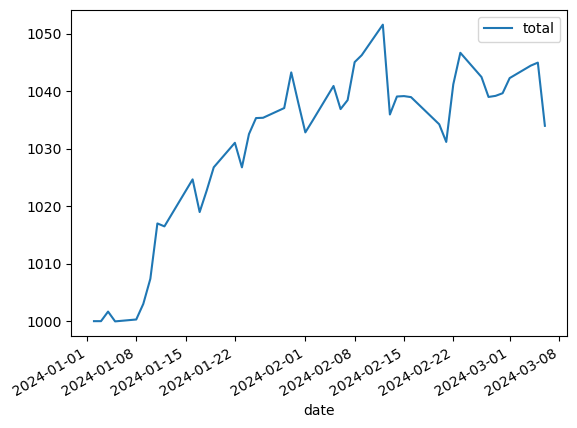

In [4]:
stock = Stock('MSFT')
stock.addStrategy(stock.buyStock(1))
stock.backtest()
stock.plotBackTest()

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed


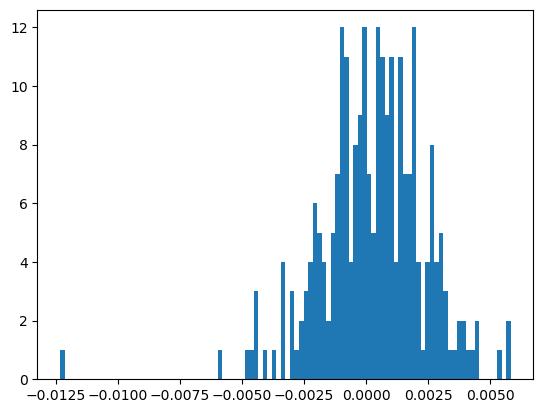

,Date,T_total,T_position,AAPL_total,AAPL_position,total_strats,cash,total,total_returns,cum_daily_return
1,2023-01-04,500.00,1.0,500.00,1.0,1000.00,0,1000.00,0.000000,0.00000
2,2023-01-05,500.27,1.0,500.24,1.0,1000.51,0,1000.51,0.000510,0.00051
3,2023-01-06,500.48,1.0,499.12,1.0,999.60,0,999.60,-0.000910,-0.00040
4,2023-01-09,500.37,1.0,503.58,1.0,1003.95,0,1003.95,0.004352,0.00395
5,2023-01-10,500.48,1.0,503.37,1.0,1003.85,0,1003.85,-0.000100,0.00385
...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22,497.63,1.0,568.29,1.0,1065.92,0,1065.92,-0.000834,0.06592
246,2023-12-26,497.63,1.0,566.72,1.0,1064.35,0,1064.35,-0.001473,0.06435
247,2023-12-27,497.62,1.0,565.60,1.0,1063.22,0,1063.22,-0.001062,0.06322
248,2023-12-28,497.67,1.0,567.25,1.0,1064.92,0,1064.92,0.001599,0.06492


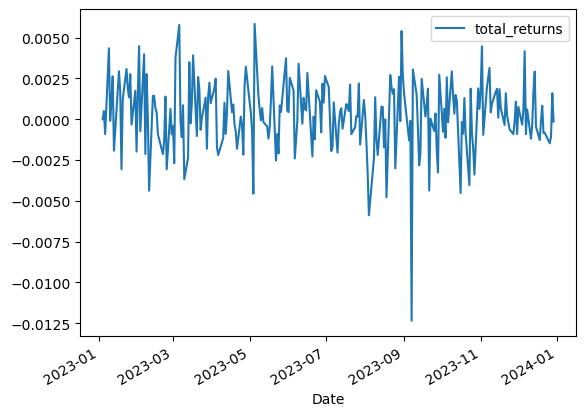

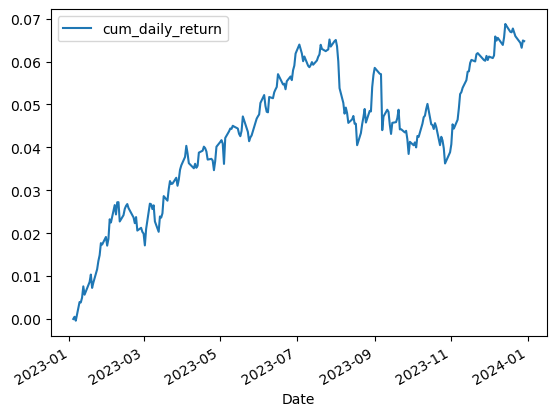

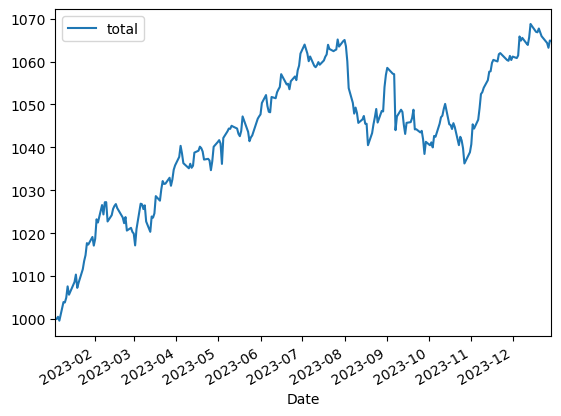

In [36]:
stock_T = Stock('T', start='2023-01-01',end='2024-01-01',initial_capital=500)
stock_T.addStrategy(stock_T.buyStock(1))
stock_AAPL = Stock('AAPL', start='2023-01-01',end='2024-01-01',initial_capital=500)
stock_AAPL.addStrategy(stock_AAPL.buyStock(1))

portfolio_instance = Portfolio(start='2023-01-01',end='2024-01-01', initial_capital=1000)
portfolio_instance.addStock(stock_T)
portfolio_instance.addStock(stock_AAPL)

portfolio_instance.backtest(plot=True)

In [37]:
portfolio_instance.backtest_df

,Date,T_total,T_position,AAPL_total,AAPL_position,total_strats,cash,total,total_returns,cum_daily_return
0,2023-01-03,500.00,0.0,500.00,0.0,1000.00,0,1000.00,NaN,NaN
1,2023-01-04,500.00,1.0,500.00,1.0,1000.00,0,1000.00,0.000000,0.00000
2,2023-01-05,500.27,1.0,500.24,1.0,1000.51,0,1000.51,0.000510,0.00051
3,2023-01-06,500.48,1.0,499.12,1.0,999.60,0,999.60,-0.000910,-0.00040
4,2023-01-09,500.37,1.0,503.58,1.0,1003.95,0,1003.95,0.004352,0.00395
...,...,...,...,...,...,...,...,...,...,...
245,2023-12-22,497.63,1.0,568.29,1.0,1065.92,0,1065.92,-0.000834,0.06592
246,2023-12-26,497.63,1.0,566.72,1.0,1064.35,0,1064.35,-0.001473,0.06435
247,2023-12-27,497.62,1.0,565.60,1.0,1063.22,0,1063.22,-0.001062,0.06322
248,2023-12-28,497.67,1.0,567.25,1.0,1064.92,0,1064.92,0.001599,0.06492


In [38]:
portfolio_instance.backtest(stats=True)

RETURNS STATS
pct_return: 0.06476999999999998
vol: 0.0021337255996145272
vol_annual: 0.03387184381579329
mean_daily_return: 0.00025435382198156145
mean_annual_return: 0.06618729889949382
skewness: -0.8589413837034555
excess_kurtosis: 4.309775721194932
shapiro: 0.9579707384109497(statistic), 1.199851567434962e-06(pvalue)


,T_total,T_position,AAPL_total,AAPL_position,total_strats,cash,total,total_returns,cum_daily_return
Date,,,,,,,,,
2023-01-04,500.00,1.0,500.00,1.0,1000.00,0,1000.00,0.000000,0.00000
2023-01-05,500.27,1.0,500.24,1.0,1000.51,0,1000.51,0.000510,0.00051
2023-01-06,500.48,1.0,499.12,1.0,999.60,0,999.60,-0.000910,-0.00040
2023-01-09,500.37,1.0,503.58,1.0,1003.95,0,1003.95,0.004352,0.00395
2023-01-10,500.48,1.0,503.37,1.0,1003.85,0,1003.85,-0.000100,0.00385
...,...,...,...,...,...,...,...,...,...
2023-12-22,497.63,1.0,568.29,1.0,1065.92,0,1065.92,-0.000834,0.06592
2023-12-26,497.63,1.0,566.72,1.0,1064.35,0,1064.35,-0.001473,0.06435
2023-12-27,497.62,1.0,565.60,1.0,1063.22,0,1063.22,-0.001062,0.06322


In [41]:
stock_T = Stock('T', start='2023-01-01',end='2024-01-01',initial_capital=500)
stock_T.addStrategy(stock_T.buyStock(1))
stock_AAPL = Stock('AAPL', start='2023-01-01',end='2024-01-01',initial_capital=500)
stock_AAPL.addStrategy(stock_AAPL.buyStock(1))

portfolio_instance = Portfolio(start='2023-01-01',end='2024-01-01', initial_capital=1000)
portfolio_instance.addStock(stock_T)
portfolio_instance.addStock(stock_AAPL)
portfolio_instance.backtest(ff_stats=True,ff_2=True)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
FF STATS
adjusted_r_squared: 0.849588541169676
HML p value: 0.0606139490757374
SMB p value: 0.8853677053716486
RMW p value: 0.559643202262209
CMA p value: 0.31903572058407426
HML: -0.14566736222180093
SMB: -0.008482231201186671
RMW: -0.0523536318665775
CMA: 0.09641138833319472
Alpha: -0.0017578290519949101
Annual Alpha: -0.020891
ann_alpha: -0.020891201312461583
Beta: 0.1965724067598819


,T_total,T_position,AAPL_total,AAPL_position,total_strats,cash,total,total_returns,cum_daily_return
Date,,,,,,,,,
2023-01-04,500.00,1.0,500.00,1.0,1000.00,0,1000.00,0.000000,0.00000
2023-01-05,500.27,1.0,500.24,1.0,1000.51,0,1000.51,0.000510,0.00051
2023-01-06,500.48,1.0,499.12,1.0,999.60,0,999.60,-0.000910,-0.00040
2023-01-09,500.37,1.0,503.58,1.0,1003.95,0,1003.95,0.004352,0.00395
2023-01-10,500.48,1.0,503.37,1.0,1003.85,0,1003.85,-0.000100,0.00385
...,...,...,...,...,...,...,...,...,...
2023-12-22,497.63,1.0,568.29,1.0,1065.92,0,1065.92,-0.000834,0.06592
2023-12-26,497.63,1.0,566.72,1.0,1064.35,0,1064.35,-0.001473,0.06435
2023-12-27,497.62,1.0,565.60,1.0,1063.22,0,1063.22,-0.001062,0.06322


In [42]:
portfolio_instance.backtest(ff_stats=True,ff_2=True)

FF STATS
adjusted_r_squared: 0.849588541169676
HML p value: 0.0606139490757374
SMB p value: 0.8853677053716486
RMW p value: 0.559643202262209
CMA p value: 0.31903572058407426
HML: -0.14566736222180093
SMB: -0.008482231201186671
RMW: -0.0523536318665775
CMA: 0.09641138833319472
Alpha: -0.0017578290519949101
Annual Alpha: -0.020891
ann_alpha: -0.020891201312461583
Beta: 0.1965724067598819
FF DATA WITH RETURNS
         Mkt_RF   SMB   HML   RMW   CMA    RF   returns  port_excess
Date                                                                
2023-01    6.65  4.41 -4.01 -2.44 -4.47  0.35  1.710000     1.360000
2023-02   -2.58  0.66 -0.81  1.01 -1.33  0.34  0.315603    -0.024397
2023-03    2.51 -6.94 -8.85  2.24 -2.37  0.36  1.518166     1.158166
2023-04    0.61 -2.56 -0.04  2.42  2.86  0.35  0.419965     0.069965
2023-05    0.35 -0.38 -7.72 -1.81 -7.22  0.36  0.680671     0.320671
2023-06    6.46  1.34 -0.26  2.18 -1.62  0.40  1.397974     0.997974
2023-07    3.21  2.86  4.11 -0.57  0.

/Users/lucasmoyer/anaconda3/envs/fin/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=12
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


,T_total,T_position,AAPL_total,AAPL_position,total_strats,cash,total,total_returns,cum_daily_return
Date,,,,,,,,,
2023-01-04,500.00,1.0,500.00,1.0,1000.00,0,1000.00,0.000000,0.00000
2023-01-05,500.27,1.0,500.24,1.0,1000.51,0,1000.51,0.000510,0.00051
2023-01-06,500.48,1.0,499.12,1.0,999.60,0,999.60,-0.000910,-0.00040
2023-01-09,500.37,1.0,503.58,1.0,1003.95,0,1003.95,0.004352,0.00395
2023-01-10,500.48,1.0,503.37,1.0,1003.85,0,1003.85,-0.000100,0.00385
...,...,...,...,...,...,...,...,...,...
2023-12-22,497.63,1.0,568.29,1.0,1065.92,0,1065.92,-0.000834,0.06592
2023-12-26,497.63,1.0,566.72,1.0,1064.35,0,1064.35,-0.001473,0.06435
2023-12-27,497.62,1.0,565.60,1.0,1063.22,0,1063.22,-0.001062,0.06322


In [43]:
port = Portfolio(start='2023-06-01',end='2024-01-01',initial_capital=10000)
tickers = ['MSFT', 'AAPL','GOOG', 'AMZN']
port.equalWeightedPortfolio(tickers, 10000)
port.backtest(stats=True,ff_stats=True)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
RETURNS STATS
pct_return: 0.137909
vol: 0.01194181803868905
vol_annual: 0.189570484394138
mean_daily_return: 0.0009567094072444155
mean_annual_return: 0.2724898808433627
skewness: -0.3331694628289019
excess_kurtosis: 0.3130210981936834
shapiro: 0.9881378412246704(statistic), 0.24916397035121918(pvalue)
FF STATS
adjusted_r_squared: 0.7518189864566449
HML p value: 0.8671800070505499
SMB p value: 0.3701214318389131
RMW p value: 0.74954219161056
CMA p value: 0.7687299964626838
HML: 0.4464475666378125
SMB: -1.0565020110910546
RMW: -0.37156878720269587
CMA: 1.000403529833392
Alpha: 0.0016626049706232528
Annual Alpha: 0.020135
ann_alpha: 0.02013471537914646
Beta: 0.9538892838069543


,MSFT_total,MSFT_position,AAPL_total,AAPL_position,GOOG_total,GOOG_position,AMZN_total,AMZN_position,total_strats,cash,total,total_returns,cum_daily_return
Date,,,,,,,,,,,,,
2023-06-02,2500.00,7.48,2500.00,13.81,2500.00,20.08,2500.00,20.01,10000.00,0.0,10000.00,0.000000,0.000000
2023-06-05,2507.26,7.48,2522.10,13.81,2502.41,20.08,2468.78,20.01,10000.55,0.0,10000.55,0.000055,0.000055
2023-06-06,2508.08,7.48,2485.36,13.81,2542.37,20.08,2503.00,20.01,10038.81,0.0,10038.81,0.003826,0.003881
2023-06-07,2480.55,7.48,2464.23,13.81,2561.95,20.08,2541.83,20.01,10048.56,0.0,10048.56,0.000971,0.004856
2023-06-08,2422.89,7.48,2456.78,13.81,2461.74,20.08,2461.78,20.01,9803.19,0.0,9803.19,-0.024418,-0.019681
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,2794.91,7.48,2695.41,13.81,2854.25,20.08,3077.37,20.01,11421.94,0.0,11421.94,0.002845,0.142194
2023-12-26,2804.79,7.48,2673.73,13.81,2871.31,20.08,3073.17,20.01,11423.00,0.0,11423.00,0.000093,0.142300
2023-12-27,2794.99,7.48,2658.26,13.81,2868.30,20.08,3073.17,20.01,11394.72,0.0,11394.72,-0.002476,0.139472


In [44]:
port = Portfolio(start='2023-06-01',end='2024-01-01',initial_capital=10000)
tickers = ['MSFT', 'AAPL','GOOG', 'AMZN']
port.marketCapWeightedPortfolio(tickers, capital=10000)
port.backtest(stats=True,ff_stats=True)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
For stock MSFT, Market cap=3040000000000.0, Weight=0.3314796641587613
For stock AAPL, Market cap=2613000000000.0, Weight=0.28491985606804054
For stock GOOG, Market cap=1681000000000.0, Weight=0.18329516955620978
For stock AMZN, Market cap=1837000000000.0, Weight=0.20030531021698833
RETURNS STATS
pct_return: 0.13068400000000002
vol: 0.011561712804649299
vol_annual: 0.1835365008663189
mean_daily_return: 0.0009085652195579772
mean_annual_return: 0.2571590920186402
skewness: -0.33241390230409346
excess_kurtosis: 0.3019682807126407
shapiro: 0.9881760478019714(statistic), 0.2514868974685669(pvalue)
FF STATS
adjusted_r_squared: 0.8672476419044775
HML p value: 0.8918427586158314
SMB p value: 0.27763377923837396
RMW p value: 0.596072412123066
CMA p value: 0.49048531978913734
HML: -0.2738948

,MSFT_total,MSFT_position,AAPL_total,AAPL_position,GOOG_total,GOOG_position,AMZN_total,AMZN_position,total_strats,cash,total,total_returns,cum_daily_return
Date,,,,,,,,,,,,,
2023-06-02,3314.80,9.92,2849.20,15.74,1832.95,14.72,2003.05,16.03,10000.00,9.094947e-13,10000.00,0.000000,0.000000
2023-06-05,3324.42,9.92,2874.38,15.74,1834.72,14.72,1978.04,16.03,10011.56,9.094947e-13,10011.56,0.001156,0.001156
2023-06-06,3325.51,9.92,2832.52,15.74,1864.02,14.72,2005.46,16.03,10027.51,9.094947e-13,10027.51,0.001593,0.002751
2023-06-07,3289.01,9.92,2808.44,15.74,1878.37,14.72,2036.57,16.03,10012.39,9.094947e-13,10012.39,-0.001508,0.001239
2023-06-08,3212.55,9.92,2799.94,15.74,1804.90,14.72,1972.43,16.03,9789.82,9.094947e-13,9789.82,-0.022229,-0.021018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,3705.83,9.92,3071.90,15.74,2092.68,14.72,2465.65,16.03,11336.06,9.094947e-13,11336.06,0.002138,0.133606
2023-12-26,3718.92,9.92,3047.19,15.74,2105.19,14.72,2462.29,16.03,11333.59,9.094947e-13,11333.59,-0.000218,0.133359
2023-12-27,3705.93,9.92,3029.57,15.74,2102.98,14.72,2462.29,16.03,11300.77,9.094947e-13,11300.77,-0.002896,0.130077


In [45]:
port = Portfolio(start='2023-01-01',end='2024-01-01',initial_capital=10000)
tickers = ['MSFT', 'AAPL','GOOG', 'AMZN']
port.marketCapWeightedPortfolio(tickers, capital=10000)
port.backtest(stats=True,ff_stats=True)

[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
For stock MSFT, Market cap=3040000000000.0, Weight=0.3314796641587613
For stock AAPL, Market cap=2613000000000.0, Weight=0.28491985606804054
For stock GOOG, Market cap=1681000000000.0, Weight=0.18329516955620978
For stock AMZN, Market cap=1837000000000.0, Weight=0.20030531021698833
RETURNS STATS
pct_return: 0.5965899999999997
vol: 0.012954355396730026
vol_annual: 0.20564401664937074
mean_daily_return: 0.001964428463343194
mean_annual_return: 0.6397607994852244
skewness: 0.13981817448170822
excess_kurtosis: 0.8643415181225809
shapiro: 0.9919854998588562(statistic), 0.1944042444229126(pvalue)
FF STATS
adjusted_r_squared: 0.9107784141802374
HML p value: 0.00731576551001935
SMB p value: 0.10547794770478407
RMW p value: 0.021711598238761547
CMA p value: 0.10581780359638678
HML: -0.98220

,MSFT_total,MSFT_position,AAPL_total,AAPL_position,GOOG_total,GOOG_position,AMZN_total,AMZN_position,total_strats,cash,total,total_returns,cum_daily_return
Date,,,,,,,,,,,,,
2023-01-04,3314.80,13.64,2849.20,21.87,1832.95,20.14,2003.05,23.14,10000.00,9.094947e-13,10000.00,0.000000,0.000000
2023-01-05,3245.52,13.64,2854.45,21.87,1773.74,20.14,1974.82,23.14,9848.53,9.094947e-13,9848.53,-0.015147,-0.015147
2023-01-06,3188.25,13.64,2829.95,21.87,1759.44,20.14,1921.59,23.14,9699.23,9.094947e-13,9699.23,-0.015160,-0.030077
2023-01-09,3235.29,13.64,2927.49,21.87,1796.40,20.14,2024.11,23.14,9983.29,9.094947e-13,9983.29,0.029287,-0.001671
2023-01-10,3253.16,13.64,2922.90,21.87,1746.55,20.14,2026.66,23.14,9949.27,9.094947e-13,9949.27,-0.003408,-0.005073
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,5243.02,13.64,4342.69,21.87,2862.51,20.14,3558.75,23.14,16006.97,9.094947e-13,16006.97,0.002092,0.600697
2023-12-26,5261.02,13.64,4308.35,21.87,2879.63,20.14,3553.89,23.14,16002.89,9.094947e-13,16002.89,-0.000255,0.600289
2023-12-27,5243.16,13.64,4283.86,21.87,2876.61,20.14,3553.89,23.14,15957.52,9.094947e-13,15957.52,-0.002835,0.595752


[*********************100%***********************]  1 of 1 completed


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
RETURNS STATS
pct_return: 0.18454481545518464
vol: 0.015015963498821693
vol_annual: 0.23837103068343318
mean_daily_return: 0.0012808529223340935
mean_annual_return: 0.38066932425425004
skewness: 0.4209917434556346
excess_kurtosis: 2.2880414361445247
shapiro: 0.9728732109069824(statistic), 0.005614677909761667(pvalue)
FF STATS
adjusted_r_squared: 0.660736372829573
HML p value: 0.493227480485646
SMB p value: 0.4815641842234486
RMW p value: 0.5271803897665959
CMA p value: 0.36892595860871347
HML: -2.401834048754395
SMB: -0.8203203745277482
RMW: -0.9163972041545303
CMA: 4.483476561095718
Alpha: 0.08072640678587777
Annual Alpha: 1.538570
ann_alpha: 1.538570093062484
Beta: 0.7206861583893249


,MSFT_total,MSFT_position,AAPL_total,AAPL_position,GOOG_total,GOOG_position,AMZN_total,AMZN_position,total_strats,cash,total,total_returns,cum_daily_return
Date,,,,,,,,,,,,,
2023-06-05,3503.64,10.45,116.16,0.64,428.24,3.44,5889.05,47.74,9937.09,-9.094947e-13,9937.09,-0.006292,-0.006292
2023-06-06,3504.79,10.45,114.47,0.64,435.08,3.44,5970.69,47.74,10025.03,-9.094947e-13,10025.03,0.008850,0.002502
2023-06-07,3466.32,10.45,113.50,0.64,438.43,3.44,6063.30,47.74,10081.55,-9.094947e-13,10081.55,0.005638,0.008154
2023-06-08,3385.74,10.45,113.15,0.64,421.28,3.44,5872.34,47.74,9792.51,-9.094947e-13,9792.51,-0.028670,-0.020750
2023-06-09,3396.71,10.45,115.44,0.64,421.20,3.44,5923.43,47.74,9856.78,-9.094947e-13,9856.78,0.006563,-0.014323
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,3905.61,10.45,124.15,0.64,488.45,3.44,7340.79,47.74,11859.00,-9.094947e-13,11859.00,0.003235,0.185899
2023-12-26,3919.41,10.45,123.15,0.64,491.38,3.44,7330.76,47.74,11864.70,-9.094947e-13,11864.70,0.000481,0.186469
2023-12-27,3905.71,10.45,122.43,0.64,490.86,3.44,7330.76,47.74,11849.76,-9.094947e-13,11849.76,-0.001259,0.184975


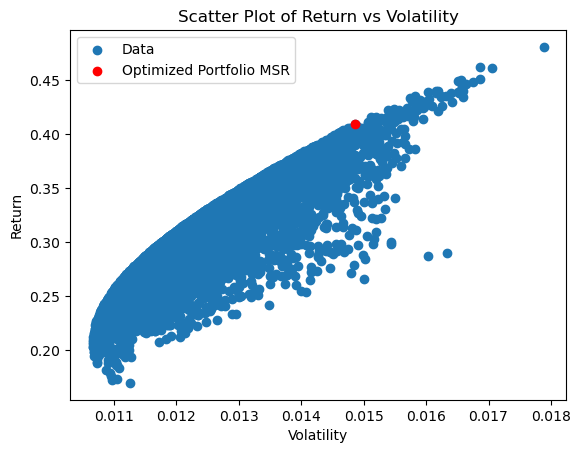

In [46]:
tickers = ['MSFT', 'AAPL','GOOG', 'AMZN']
portfolio_instance = Portfolio(tickers=tickers,start='2023-06-01',end='2024-01-01',initial_capital=10000,save_new=True)
markov = portfolio_instance.markowitz(weight=10000, plot=True, msr=True)
portfolio_instance.backtest(stats=True,ff_stats=True)

In [47]:
markov

(      id    return  volatility  \
 0      0  0.334281    0.012772   
 0      1  0.356997    0.013325   
 0      2  0.219529    0.010691   
 0      3  0.234533    0.011070   
 0      4  0.260277    0.011346   
 ..   ...       ...         ...   
 0   9995  0.310267    0.012711   
 0   9996  0.318654    0.012206   
 0   9997  0.279970    0.011473   
 0   9998  0.303058    0.011858   
 0   9999  0.299893    0.011919   
 
                                               weights     sharpe  
 0   [0.3293666744604492, 0.1173537605874138, 0.224...  26.172078  
 0   [0.39821530972686886, 0.04200077420259306, 0.1...  26.791752  
 0   [0.2995365927625584, 0.5228629073700798, 0.118...  20.533835  
 0   [0.43160411604536797, 0.32404619112141547, 0.2...  21.185829  
 0   [0.3655990916874489, 0.2737741434421483, 0.272...  22.940715  
 ..                                                ...        ...  
 0   [0.047688168009572554, 0.3235458732679076, 0.2...  24.409708  
 0   [0.3249934818780121, 0.283184

In [48]:
port = Portfolio(start='2023-06-01',end='2024-01-01',initial_capital=10000,save_new=True)
tickers = ['VTI']
port.equalWeightedPortfolio(tickers, 10000)
port.backtest(stats=True,ff_stats=True)

[*********************100%***********************]  1 of 1 completed


RETURNS STATS
pct_return: 0.13033999999999996
vol: 0.007530841924053784
vol_annual: 0.11954840936391291
mean_daily_return: 0.0008678476918580488
mean_annual_return: 0.2443368969115698
skewness: 0.04647604802017963
excess_kurtosis: 0.33704549666945827
shapiro: 0.9942159056663513(statistic), 0.8286586999893188(pvalue)
FF STATS
adjusted_r_squared: 0.9752055082950601
HML p value: 0.3923486047399327
SMB p value: 0.9172928610703561
RMW p value: 0.44608641574579233
CMA p value: 0.3014423655507399
HML: 1.1150019556189354
SMB: -0.03397393134687169
RMW: -0.3975023619022963
CMA: -1.9236262290855322
Alpha: -0.028351864384275897
Annual Alpha: -0.291878
ann_alpha: -0.2918777179627725
Beta: 0.7837714300356573


,VTI_total,VTI_position,total_strats,cash,total,total_returns,cum_daily_return
Date,,,,,,,
2023-06-02,10000.00,47.47,10000.00,0.0,10000.00,0.000000,0.000000
2023-06-05,10097.78,47.47,10097.78,0.0,10097.78,0.009778,0.009778
2023-06-06,10062.65,47.47,10062.65,0.0,10062.65,-0.003479,0.006265
2023-06-07,10126.26,47.47,10126.26,0.0,10126.26,0.006321,0.012626
2023-06-08,10092.56,47.47,10092.56,0.0,10092.56,-0.003328,0.009256
...,...,...,...,...,...,...,...
2023-12-22,11229.83,47.47,11229.83,0.0,11229.83,0.006423,0.122983
2023-12-26,11248.34,47.47,11248.34,0.0,11248.34,0.001648,0.124834
2023-12-27,11296.75,47.47,11296.75,0.0,11296.75,0.004304,0.129675


In [4]:
stock = Stock('MSFT',start='2023-06-01',end='2024-01-01', save_new=True)
stock.addStrategy(stock.buyStock(1))
stock.backtest()
stock.saveToCSV()
stock.backtrader()

[*********************100%***********************]  1 of 1 completed
Save to CSV
(2023, 6, 1)
(2024, 1, 1)
Debug set to True!!!!
path is /Users/lucasmoyer/development/two-dolla/datasets/stock_csvs/MSFT.csv
Dates are from (2023, 6, 1) to (2024, 1, 1)
Starting Portfolio Value: 1000.00
2023-12-29, <backtrader.linebuffer.LineBuffer object at 0x28c101310>
2023-06-02, Position, 1.00
2023-06-02, BUY CREATE, 1.00
get sizing called
1.0
0.0
1.0
2023-06-05, BUY EXECUTED, Price: 335.22, Cost: 335.22, Comm 0.00
2023-06-05, Position, 1.00
2023-06-06, Position, 1.00
2023-06-07, Position, 1.00
2023-06-08, Position, 1.00
2023-06-09, Position, 1.00
2023-06-12, Position, 1.00
2023-06-13, Position, 1.00
2023-06-14, Position, 1.00
2023-06-15, Position, 1.00
2023-06-16, Position, 1.00
2023-06-20, Position, 1.00
2023-06-21, Position, 1.00
2023-06-22, Position, 1.00
2023-06-23, Position, 1.00
2023-06-26, Position, 1.00
2023-06-27, Position, 1.00
2023-06-28, Position, 1.00
2023-06-29, Position, 1.00
2023-06-30

<IPython.core.display.Javascript object>